#                               THE SPARKS FOUNDATION : GRIPAUGUST21


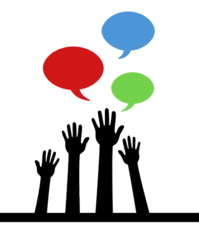

## TASK 1 : PREDICTION USING DECISION TREE ALGORITHM (INTERMEDIATE)

## AUTHOR : ANIRUDH GUPTA

## ALL THE PREREQUISITES

In [224]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [225]:
# Importing the dataset into a dataframe
df = pd.read_csv("Iris.csv")

In [226]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


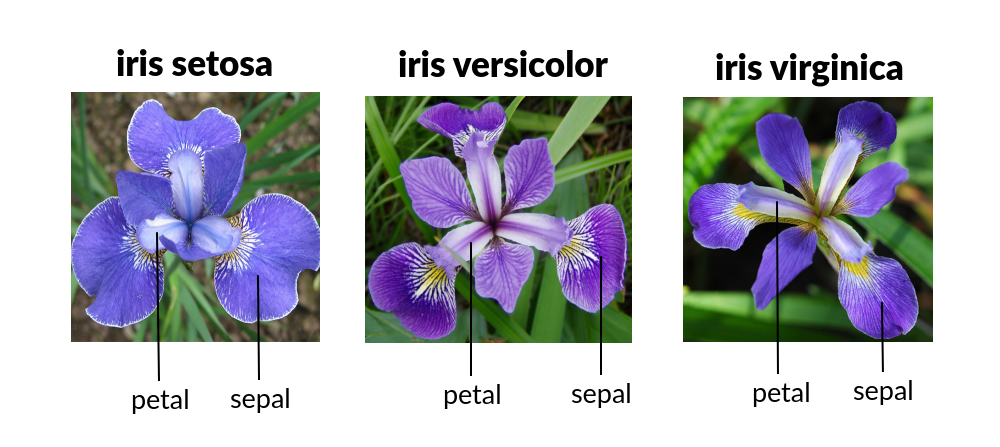

## OVERALL STUDY OF THE DATA



In [227]:
df.shape

(150, 6)

#### Our dataset has 150 rows and 6 columns

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### We see that all the variables are of correct data types thus we do not require any change

In [229]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Within the above table we do not find anything that requires our attention 

## CHECKING FOR THE MISSING VALUES AND BLANK SPACES

In [230]:
# First of all we will check if there are any missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Thus we see that no columns have any missing values

In [231]:
# Now we will check if there are any blank spaces

# First of all we will see if there are any blank spaces in the numeric data type columns
for i in df.select_dtypes(["int64", "float64"]):
    bs = df[i].astype(str).str.isspace().sum()
    print(i, bs)

Id 0
SepalLengthCm 0
SepalWidthCm 0
PetalLengthCm 0
PetalWidthCm 0


#### Thus we see that there are no blank spaces in numeric data type columns

In [232]:
# Now we will check for the black spaces in object data type columns
for i in df.select_dtypes("object"):
    bs = df[i].str.isspace().sum()
    print(i,bs)

Species 0


#### There are no blank spaces in object datatype column either

## We know that for Decision Tree Algorithm, we do not need to remove the outliers from numeric data type columns nor are we required to scale the numeric data type variables

## MODEL CREATION

In [233]:
# We here are removing id column as it is not required for our analysis
df.drop(columns=["Id"], inplace=True)

In [234]:
# We will now define our independent(x) and dependent(y) variables
x = df.drop(columns = [
    "Species"
])

In [235]:
y = df["Species"]

In [236]:
# We will now split our data into train and test data
from sklearn.model_selection import train_test_split

In [237]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state= 25) 

In [238]:
# we will now go on to import our classifier and create the model
from sklearn.tree import DecisionTreeClassifier

In [239]:
dtc = DecisionTreeClassifier()

## MODEL HYPERPARAMETER TUNING

In [240]:
# We will now tune the hyper parameters of this decision tree as we know Decision Trees are prone to overfitting
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [244]:
params = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : np.arange(0,20,2),
    "min_samples_split" : np.arange(0,20,2),
}


dtc_rs = RandomizedSearchCV(dtc, param_distributions=params, cv= 5, verbose=True, n_jobs=-1, n_iter=100, random_state=25)
dtc_rs.fit(xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=25, verbose=True)

In [245]:
dtc_gs.best_params_


{'min_samples_split': 2, 'max_depth': 4, 'criterion': 'gini'}

In [246]:
dtc1 = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=2)

## FITTING THE MODEL AND MAKING THE PREDICTION

In [247]:
# Fitting the model
dtc1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

In [248]:
# Checking train score
dtc1.score(xtrain,ytrain)

0.9833333333333333

In [249]:
# Checking test score
dtc1.score(xtest,ytest)

0.9333333333333333

In [250]:
# Making the prediction on test data
y_test_pred = dtc1.predict(xtest)

## EVALUATING THE PREDICTION

In [251]:
from sklearn.metrics import classification_report

In [252]:
print(classification_report(ytest,y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Thus our model accuracy is coming out to be 93% with the test data

## VISUALISING THE DECISION TREE

In [179]:
from sklearn import tree

In [253]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

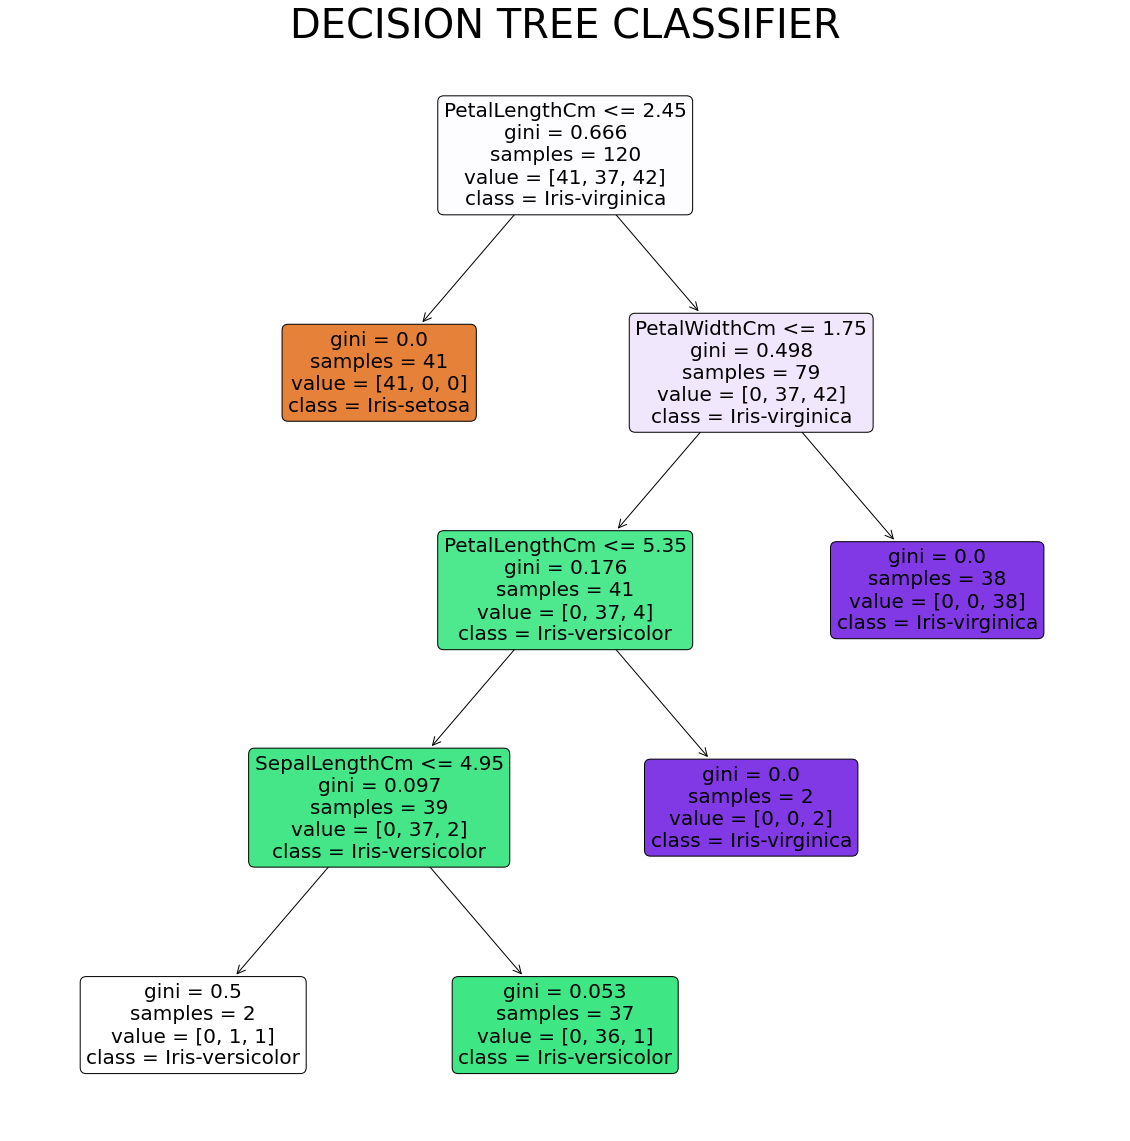

In [259]:
fn = x.columns
cn = dtc1.classes_
plt.figure(figsize = (20,20))
tree.plot_tree(dtc1, filled =True, rounded=True, fontsize=20, feature_names=fn, class_names=cn)
plt.title("DECISION TREE CLASSIFIER", fontsize = 40);

## CONCLUSION
We studied our dataset and created a Decision Tree Classifier, `dtc1`. Now if any new observation will be passed to the classifier, it will predict the class of target variable correctly with 93% accuracy.